# Regriding and remapping adjacent tracer columns

In [1]:
import xarray as xr
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from misc import yzplot
from mom6_tools.MOM6grid import MOM6grid
import sys
plt.rcParams.update({'font.size': 15})

Basemap module not found. Some regional plots may not function properly


In [2]:
sys.path.append('/glade/u/home/gmarques/libs/mom6-remapping/')
from remapping import mom_remapping
cs = mom_remapping.Remapping_Cs()
cs.interpolation_scheme = 3
cs.degree = 1

### Native interface and target cell thickness

In [3]:
# interfaces
eta = np.zeros((6,2))
eta[:,0] = np.array([0., 2., 3.5, 5., 7., 10.])
eta[:,1] = np.array([0., 3.,  5., 6., 8., 10.])
# thicknesses
h = np.zeros((5,2))
h[:,0] = eta[1::,0] - eta[0:-1,0]
h[:,1] = eta[1::,1] - eta[0:-1,1]
# position of cell center
z_L = 0.5*(eta[0:-1,0]+eta[1::,0])
z_R = 0.5*(eta[0:-1,1]+eta[1::,1])
# BLDs
BLD = np.zeros((2))
BLD[0] = 9.
BLD[1] = 4.5

### Tracer profiles

In [4]:
tracer = np.zeros((5,2))
tracer[:,0] = np.interp(z_L, [0,10.],[2.,1.])
tracer[:,1] = np.interp(z_R, [0,10.],[1.9,0.9])

### LBD-z grid

In [5]:
int_LBD =np.array([0.,2.,3.,3.5,4.5, 5.,6.,7.,8, 9.])
z_LBD = 0.5*(int_LBD[0:-1]+int_LBD[1::])
h_LBD = np.zeros((len(int_LBD)-1,2))
h_LBD[:,0] = int_LBD[1::] - int_LBD[0:-1]
h_LBD[:,1] = int_LBD[1::] - int_LBD[0:-1]

In [6]:
tracer_LBD = np.zeros(h_LBD.shape)
tracer_LBD[:,0] = np.interp(z_LBD, z_L, tracer[:,0])
tracer_LBD[:,1] = np.interp(z_LBD, z_R, tracer[:,1])

### Grids

In [7]:
x1 = [0, 100.]
x2 = [100., 200.]
# native
[X1,Z1] = np.meshgrid(x1,eta[:,0])
[X2,Z1] = np.meshgrid(x2,eta[:,0])
# LBD
[X1_Z,Z1] = np.meshgrid(x1,int_LBD)
[X2_Z,Z1] = np.meshgrid(x2,int_LBD)

### Plots

#### Merged BLDs and interfaces

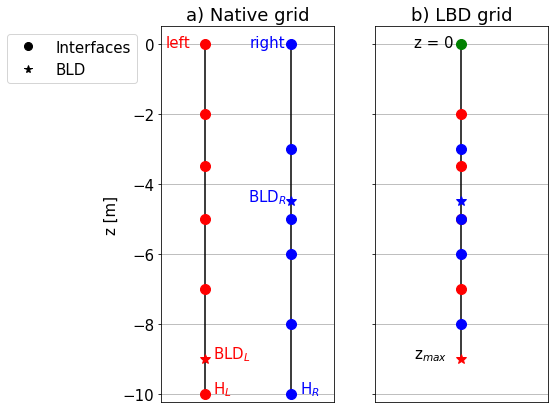

In [8]:
%matplotlib inline
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,6), sharey=True, sharex=False)
ax0=ax[0]

ax0.plot([-0.5],[0],'o', color='k', ms=8, label='Interfaces')
ax0.plot([-0.5],-BLD[0],'*', color='k', ms=8, label='BLD')
ax0.legend(bbox_to_anchor=(-0.1,1), loc="upper right")

ax0.plot([-0.5, -0.5], [-10,0], 'k-')
ax0.plot([-0.5],-BLD[0],'*', color='red', ms=10)
ax0.plot(np.zeros(len(eta[:,0]))-0.5, -eta[:,0], 'o', color='red', ms=10)
ax0.set_xlim(-1,1)
ax0.axes.get_xaxis().set_visible(False)
ax0.text(-0.95, -0.1,'left', color='red')
ax0.text(0.02, -0.1,'right', color='blue')
ax0.text(0., -BLD[1],r'BLD$_R$', color='blue')
ax0.text(-0.4, -BLD[0],r'BLD$_L$', color='red')

ax0.set_ylabel('z [m]')
#ax0.grid()

ax1=ax[0]
ax1.plot(np.zeros(2) + 0.5, [-10,0], 'k-')
ax1.plot([0.5],-BLD[1],'*', color='blue', ms=10)
ax1.plot(np.zeros(len(eta[:,1])) + 0.5, -eta[:,1],'o', color='blue', ms=10)
ax1.axes.get_xaxis().set_visible(False)
#ax[1].invert_yaxis()
ax1.set_title('a) Native grid')
ax1.grid()

ax2=ax[1]
ax2.plot(np.zeros(2), [-BLD[0],0], 'k-')
ax2.plot(np.zeros(len(eta[:,0])-2), -eta[1:-1,0],'o', color='red', ms=10)
ax2.plot(np.zeros(len(eta[:,1])-2), -eta[1:-1,1],'o', color='blue', ms=10)
ax2.plot([0.],-BLD[0],'*', color='red', ms=10)
ax2.plot([0.],-BLD[1],'*', color='blue', ms=10)
ax2.plot([0.],[0],'o', color='green', ms=10)
ax2.text(-0.03,-0.1,'z = 0')
ax2.text(-0.03,-BLD[0],'z$_{max}$')

ax2.axes.get_xaxis().set_visible(False)
ax2.set_title('b) LBD grid')
ax2.grid()

ax0.set_ylim(-10.25,0.5)

ax0.text(0.6, -10,r'H$_R$', color='blue')
ax0.text(-0.4, -10,r'H$_L$', color='red')

#ax0.text(-0.1, -1, 'Begin text', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

fig.tight_layout(w_pad=2.5)

plt.savefig('PNG/merged_interfaces_LBD_grid.png',dpi=300,bbox_inches='tight')

#### Schematic before/after diffusion

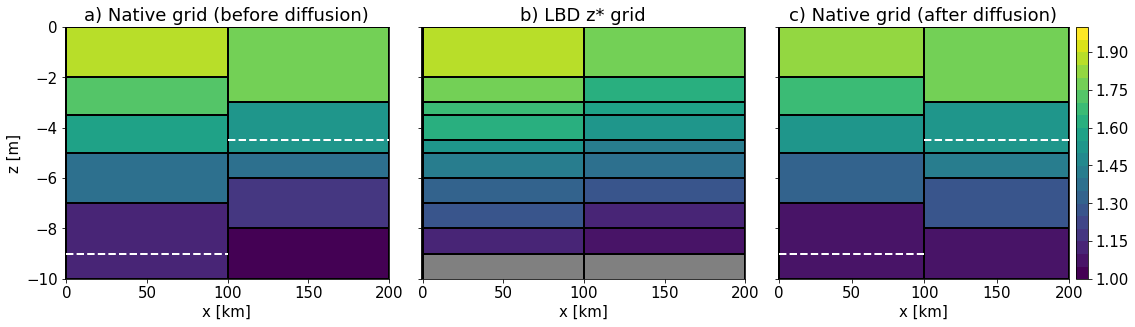

In [17]:
%matplotlib inline

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5), sharey=True, sharex=True)

lim = (1, 2)
cmap = plt.cm.viridis
nb = 30
# a
yzplot(tracer, np.array([0, 100., 200.]), -eta, nbins=nb, centerlabels=True, clim=lim, 
       show_stats=0, axis=ax[0], colormap=cmap,cbar=False)
ax[0].set_ylabel('z [m]') 
ax[0].set_xlabel('x [km]') 
ax[0].set_title('a) Native grid (before diffusion)')
ax[0].plot([0,0],[-10,0], 'k', lw=2)
ax[0].plot([100,100],[-10,0], 'k', lw=2)
ax[0].plot([200,200],[-10,0], 'k', lw=2)
for k in range(len(eta[:,0])):
  ax[0].plot(X1[k,:],-np.ones(2)*eta[k,0], 'k', lw=2)
  ax[0].plot(X2[k,:],-np.ones(2)*eta[k,1], 'k', lw=2)
# BLD
ax[0].plot([0,100],-np.ones(2)*BLD[0], 'w', lw=2, linestyle='dashed') 
ax[0].plot([100,200],-np.ones(2)*BLD[1], 'w', lw=2, linestyle='dashed') 

#b
yzplot(tracer_LBD, np.array([0, 100., 200.]), -Z1, nbins=nb, centerlabels=True, clim=lim, 
       show_stats=0, axis=ax[1], colormap=cmap,cbar=False)

ax[1].plot([0,0],[-10,0], 'k', lw=2)
ax[1].plot([100,100],[-10,0], 'k', lw=2)
ax[1].plot([200,200],[-10,0], 'k', lw=2)
for k in range(len(Z1[:,0])):
  ax[1].plot(X1_Z[k,:],-Z1[k,:], 'k', lw=2)
  ax[1].plot(X2_Z[k,:],-Z1[k,:], 'k', lw=2)

ax[1].set_ylabel('') 
ax[1].set_xlabel('x [km]') 
ax[1].set_title('b) LBD z* grid')

#c
tracer_diff = tracer.copy()
tracer_diff[:,0] = tracer[:,0] - 0.05
tracer_diff[:,1] = tracer[:,1] + 0.05
yzplot(tracer_diff, np.array([0, 100., 200.]), -eta, nbins=nb, centerlabels=True, clim=lim, 
       show_stats=0, axis=ax[2], colormap=cmap,cbar=True)
ax[2].set_ylabel('') 
ax[2].set_xlabel('x [km]') 
ax[2].set_title('c) Native grid (after diffusion)')
ax[2].plot([0,0],[-10,0], 'k', lw=2)
ax[2].plot([100,100],[-10,0], 'k', lw=2)
ax[2].plot([200,200],[-10,0], 'k', lw=2)
for k in range(len(eta[:,0])):
  ax[2].plot(X1[k,:],-np.ones(2)*eta[k,0], 'k', lw=2)
  ax[2].plot(X2[k,:],-np.ones(2)*eta[k,1], 'k', lw=2)

# BLD
ax[2].plot([0,100],-np.ones(2)*BLD[0], 'w', lw=2, linestyle='dashed') 
ax[2].plot([100,200],-np.ones(2)*BLD[1], 'w', lw=2, linestyle='dashed') 

#ax[2].set_ylim(-50,-0)
ax[2].set_ylim(-10,0)
ax[2].set_xlim(-1,200.1)

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.1)

plt.savefig('PNG/native_LBD_schematic.png',dpi=300,bbox_inches='tight')

0.9444444444444444
0.7777777777777778
0.5555555555555556
0.33333333333333337
0.11111111111111116


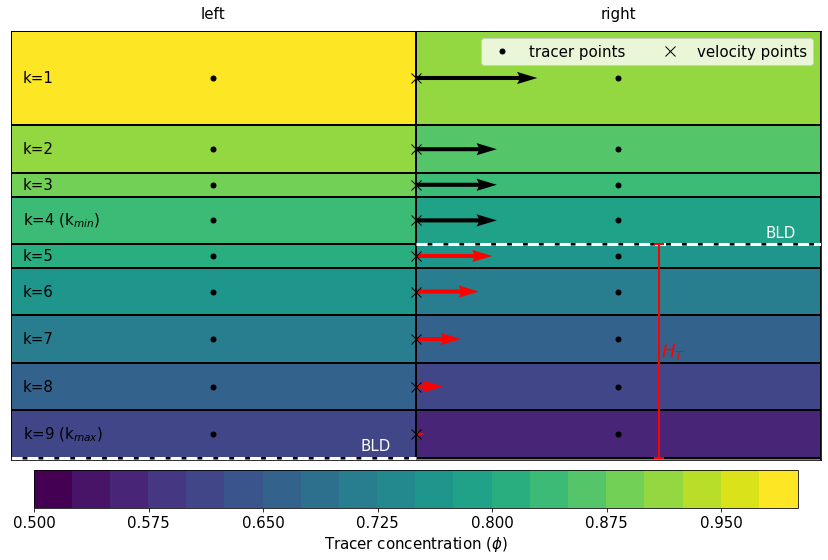

In [10]:
%matplotlib inline
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
lim = (0.5, 1)
cmap = plt.cm.viridis
nb = 20

yzplot(tracer_LBD/tracer_LBD.max(), np.array([0, 100., 200.]), -Z1, nbins=nb, centerlabels=True, clim=lim, 
       show_stats=0, axis=ax, colormap=cmap, cbar=True, cbar_hor=True, 
       cbar_label=r'Tracer concentration ($\phi$)')
ax.set_ylabel('') 
ax.set_xlabel('') 
ax.set_xticks([])
ax.set_yticks([])
#ax.set_title('  left    right   ', loc='left',)
ax.plot([0,0],[-10,0], 'k', lw=2)
ax.plot([100,100],[-10,0], 'k', lw=2)
ax.plot([200,200],[-10,0], 'k', lw=2)

ax.set_ylim(-9.05,0)

for k in range(len(Z1[:,0])):
  ax.plot(X1_Z[k,:],-np.ones(2)*Z1[k,0], 'k', lw=2)
  ax.plot(X2_Z[k,:],-np.ones(2)*Z1[k,1], 'k', lw=2)
    
# BLD
ax.plot([0,100],-np.ones(2)*BLD[0], 'w', lw=3, linestyle='dashed') 
ax.plot([100,200],-np.ones(2)*BLD[1], 'w', lw=3, linestyle='dashed') 

# tracers and u points
ax.plot([50,150], [-z_LBD[0],-z_LBD[0]], '.', color="k", label='tracer points', ms= 10)
ax.plot([100], -z_LBD[0], 'x', color="k", label='velocity points', ms = 10)
ax.legend(ncol=2, loc="upper right")
#ax.legend(bbox_to_anchor=(0.1,-0.1), loc="lower left", ncol=2)

for k in range(1,len(z_LBD)):    
  ax.plot([50,150], [-z_LBD[k],-z_LBD[k]], '.', color="k", ms=10)
  ax.plot([100], -z_LBD[k], 'x', color="k", ms=10)

# HT    
ax.plot([160,160], [-BLD[0],-BLD[1]], color="r", lw= 2)
ax.plot([159,161], [-BLD[0],-BLD[0]], color="r", lw= 2)
ax.plot([159,161], [-BLD[1],-BLD[1]], color="r", lw= 2)

# fluxes
HT = BLD[0]-BLD[1]
for k in range(len(z_LBD)):  
  mag = -(tracer_LBD[k,1]-tracer_LBD[k,0])
  if z_LBD[k] < BLD[1]:
    ax.quiver([100], -z_LBD[k], [mag], [0.], width=0.005, scale = 1)
  else:
    alpha = (1./HT) * (-z_LBD[k] + BLD[1]) + 1
    print(alpha)
    mag = mag * alpha
    ax.quiver([100], -z_LBD[k], [mag], [0.], width=0.005, color='r', scale = 1)

#ax.arrow(x=90, y=-5, dx=20, dy=0, width=.1) 

# text
text = ax.text(163.5, -(0.5*(BLD[0]+BLD[1])),r'$H_T$', ha="center", va="center", color="r", fontsize=18)

text = ax.text(50, 0.35, 'left', ha="center", va="center", color="k")
text = ax.text(150, 0.35, 'right', ha="center", va="center", color="k")

text = ax.text(90, -BLD[0]+0.25, 'BLD', ha="center", va="center", color="w")
text = ax.text(190, -BLD[1]+0.25, 'BLD', ha="center", va="center", color="w")

for k in range(len(z_LBD)):
  if k+1 == 4:
    string = r'k=4 (k$_{min}$)'
  elif k+1 == 9:
    string = r'k=9 (k$_{max}$)'
  else:
    string = 'k={}'.format(k+1)
  text = ax.text(3, -z_LBD[k], string, ha="left", va="center", color="k")

fig.tight_layout()
plt.savefig('PNG/flux_calculation.png',dpi=300,bbox_inches='tight')

In [11]:
-(tracer_LBD[0,1]-tracer_LBD[0,0])

0.1499999999999999

In [12]:
tracer_LBD.shape

(9, 2)

In [13]:
BLD

array([9. , 4.5])